<a href="https://colab.research.google.com/github/aghapygad336/Image-Segmentation/blob/master/ImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from urllib.request import urlretrieve
import cv2
import os
import glob
import pandas as pd

In [14]:
if not os.path.isfile('BSR_bsds500.tgz'):
    urlretrieve('http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz','BSR_bsds500.tgz')
if not os.path.isfile('content/BSR_bsds500.tgz'):
    !apt-get install p7zip-full
    !p7zip -d BSR_bsds500.tgz
    !tar -xvf BSR_bsds500.tgz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/bin/p7zip: BSR_bsds500.tgz: unknown suffix
BSR/
BSR/documentation/
BSR/documentation/Arbelaez_Maire_Fowlkes_Malik_TPAMI2010.pdf
BSR/bench/
BSR/bench/source/
BSR/bench/source/match.hh
BSR/bench/source/Matrix.cc
BSR/bench/source/Timer.cc
BSR/bench/source/csa_types.h
BSR/bench/source/csa.cc
BSR/bench/source/correspondPixels.cc
BSR/bench/source/build.sh
BSR/bench/source/match.cc
BSR/bench/source/Sort.hh
BSR/bench/source/csa_defs.h
BSR/bench/source/Timer.hh
BSR/bench/source/Exception.cc
BSR/bench/source/String.cc
BSR/bench/source/Array.hh
BSR/bench/source/kofn.hh
BSR/bench/source/Random.hh
BSR/bench/source/Exception.hh
BSR/bench/source/.gitignore
BSR/bench/source/kofn.cc
BSR/bench/source/build.m
BSR/bench/source/Random.cc
BSR/bench/source/Point.hh
BSR/bench/source/README
B

*italicized text*

Image Dimension    :  (321, 481, 3)
Image Height       :  321
Image Width        :  481
Number of Channels :  3
Number of Pixels   :  154401


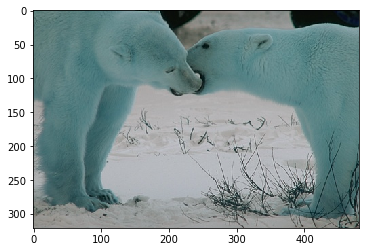

In [64]:
import numpy as np
from os import listdir
from os.path import isfile, join
import cv2

imagesFile_path = "BSR/BSDS500/data/images/train/"
imagesFile = [f for f in listdir(imagesFile_path) if isfile(join(imagesFile_path, f)) and f.endswith(".jpg")]
sortedImgfiles=sorted(imagesFile)


data = []

for i in range(len(sortedImgfiles)):
    testPlot=imagesFile_path+sortedImgfiles[i]
    img = cv2.imread(testPlot, cv2.IMREAD_UNCHANGED)

# get dimensions of image
    dimensions = img.shape
# height, width, number of channels in image
    height = img.shape[0]
    width = img.shape[1]
    channels = img.shape[2]
    numberTotalPixels=height*width
    data.append(img)
    mydata = np.array(data)

print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)
print('Number of Pixels   : ',numberTotalPixels)
plt.imshow(mydata[66])
plt.show()


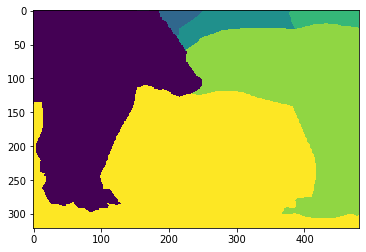

In [67]:
groundTruth_path = "BSR/BSDS500/data/groundTruth/train/"
groundTruthFile = [f for f in listdir(groundTruth_path) if isfile(join(groundTruth_path, f)) and f.endswith(".mat")]
sortedGroundTruthFile=sorted(groundTruthFile)
testPlot_=groundTruth_path+sortedGroundTruthFile[66]
matContent=scipy.io.loadmat((testPlot_)) #var type is dictionary
gt=matContent['groundTruth'][0][0][0][0][0] #getting the ground-thruth number
plt.imshow(gt)
plt.show()
